<a href="https://colab.research.google.com/github/HAL22/Kaggle-Competitions/blob/Spaceship-Titanic/Spaceship_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. **Installing libraries** 

In [1]:
%%capture
!pip install -Uqq fastcore --upgrade
!pip install -Uqq fastai --upgrade
!pip install kaggle
import pandas as pd
from fastai.vision.all import *
from fastai.tabular.all import *

2. **Accessing Kaggle and downloading the data**

In [4]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

In [4]:
%%capture
!kaggle competitions download -c spaceship-titanic

In [5]:
%%capture
!unzip spaceship-titanic.zip

In [6]:
%%capture
!unzip spaceship-titanic.zip

In [50]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [8]:
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


3. **Training the model**

In [29]:
splits = RandomSplitter(valid_pct=0.2)(range_of(df_train))

In [110]:
to = TabularPandas(df_train, procs=[Categorify, FillMissing,Normalize],
                   cat_names = ['HomePlanet','CryoSleep','Destination', 'VIP'],
                   cont_names = ['Age','RoomService','FoodCourt','Spa','VRDeck'],
                   y_names='Transported',
                   splits=splits)

In [111]:
to.xs.iloc[:2]

,HomePlanet,CryoSleep,Destination,VIP,Age_na,RoomService_na,FoodCourt_na,Spa_na,VRDeck_na,Age,RoomService,FoodCourt,Spa,VRDeck
3421,3,1,3,1,1,1,1,1,1,-2.010314,-0.336321,-0.274953,-0.272312,-0.263168
38,1,1,1,0,1,1,1,1,1,-0.963902,-0.336321,0.030985,-0.254526,0.097875


In [112]:
dls = to.dataloaders(bs=64)
test_dl = dls.test_dl(df_test, with_labels=True)

In [113]:
dls.show_batch()

,HomePlanet,CryoSleep,Destination,VIP,Age_na,RoomService_na,FoodCourt_na,Spa_na,VRDeck_na,Age,RoomService,FoodCourt,Spa,VRDeck,Transported
0,Earth,False,55 Cancri e,False,False,False,False,True,False,19.0,720.000014,2.000009,0.000009,-8.564821e-07,False
1,Europa,False,55 Cancri e,False,False,False,False,False,False,41.0,-0.000008,5737.999980,9037.999790,2.799999e+01,False
2,Earth,True,TRAPPIST-1e,False,True,False,False,False,False,27.0,-0.000008,0.000014,0.000009,-8.564821e-07,False
3,Europa,True,55 Cancri e,False,False,False,False,True,False,37.0,-0.000008,0.000014,0.000009,-8.564821e-07,True
4,Earth,False,TRAPPIST-1e,False,False,False,False,False,False,15.0,-0.000008,6.000000,980.999954,-8.564821e-07,False
5,Europa,#na#,55 Cancri e,False,False,False,False,False,False,33.0,-0.000008,1248.999963,4811.999610,1.116000e+03,False
6,Earth,False,TRAPPIST-1e,False,False,False,False,False,False,27.0,485.000011,1108.999967,0.000009,1.000000e+00,False
7,Europa,True,TRAPPIST-1e,False,False,False,False,False,False,26.0,-0.000008,0.000014,0.000009,-8.564821e-07,True
8,Europa,True,55 Cancri e,False,False,False,False,False,True,45.0,-0.000008,0.000014,0.000009,-8.564821e-07,True
9,Earth,False,TRAPPIST-1e,False,False,False,False,False,False,21.0,11.000003,0.000014,838.999974,-8.564821e-07,False


In [114]:
model = tabular_learner(dls, metrics=accuracy)

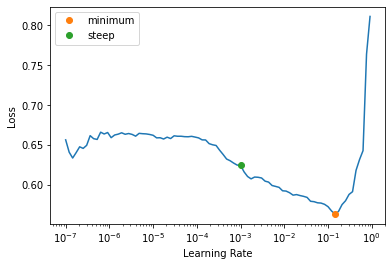

In [115]:
lr_min,lr_steep = model.lr_find(suggest_funcs=(minimum, steep))


In [116]:
print(f"Minimum/10: {lr_min:.2e}, steepest point: {lr_steep:.2e}")

Minimum/10: 1.45e-02, steepest point: 1.00e-03


In [121]:
model.fit_one_cycle(10,0.40e-03)

epoch,train_loss,valid_loss,accuracy,time
0,0.437835,0.431472,0.796893,00:01
1,0.441826,0.430453,0.795742,00:00
2,0.446386,0.447551,0.767549,00:01
3,0.448950,0.451204,0.759494,00:00
4,0.432623,0.436737,0.775604,00:00
5,0.436211,0.437618,0.777906,00:00
6,0.439686,0.432971,0.788262,00:00
7,0.433246,0.436475,0.780207,00:00
8,0.441232,0.441294,0.769275,00:00
9,0.435455,0.439467,0.776179,00:00


In [40]:
model.show_results()

,HomePlanet,CryoSleep,Destination,VIP,Age_na,RoomService_na,FoodCourt_na,ShoppingMall_na,Spa_na,VRDeck_na,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Transported_pred
0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-0.963902,-0.336321,-0.135042,-0.275484,0.615176,-0.263168,0.0,0.0
1,3.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.919639,1.272112,-0.274953,-0.258637,-0.272312,-0.194741,0.0,0.0
2,2.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.640596,-0.336321,-0.274953,-0.275484,-0.272312,-0.263168,0.0,0.0
3,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-0.894142,-0.336321,-0.274953,-0.243475,0.591166,-0.263168,0.0,0.0
4,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.780117,-0.336321,0.767850,-0.275484,-0.175382,0.024946,1.0,1.0
5,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-0.057012,-0.336321,-0.274953,-0.275484,-0.272312,-0.263168,1.0,1.0
6,3.0,2.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.570835,-0.336321,-0.274953,-0.275484,-0.272312,-0.263168,1.0,1.0
7,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.547486,-0.336321,-0.274953,-0.275484,-0.272312,-0.263168,1.0,1.0
8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.570835,-0.336321,-0.219611,-0.250214,-0.254526,0.269843,0.0,0.0


In [41]:
row, clas, probs = model.predict(df_test.iloc[0])

In [42]:
row.show()

,HomePlanet,CryoSleep,Destination,VIP,Age_na,RoomService_na,FoodCourt_na,ShoppingMall_na,Spa_na,VRDeck_na,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Earth,True,TRAPPIST-1e,False,False,False,False,False,False,False,27.0,-0.000008,0.000014,9.265932e-08,0.000009,-8.564821e-07,True


4. **Evaluating the model**

In [43]:
preds = model.get_preds(dl=test_dl)
model.validate(dl=test_dl)

(#2) [None,None]

In [44]:
preds[0]

tensor([[0.4253, 0.5747],
        [0.9536, 0.0464],
        [0.0201, 0.9799],
        ...,
        [0.1034, 0.8966],
        [0.1798, 0.8202],
        [0.4373, 0.5627]])

In [45]:
test_preds = np.exp(preds[0]).numpy().T[0]

In [53]:
len(preds[0])

4277

In [56]:
len(df_test.index)

4277

In [65]:
df_test['Transported']  = preds[0]

In [66]:
df_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,0.425309
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,0.953601
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,0.020094
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,0.046187
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,0.566986


In [65]:
df_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,0.466635
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,0.956114
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,0.036599
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,0.152526
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,0.645674


In [67]:
df_test[0:]['Transported']

0       0.425309
1       0.953601
2       0.020094
3       0.046187
4       0.566986
          ...   
4272    0.430044
4273    0.566281
4274    0.103406
4275    0.179810
4276    0.437295
Name: Transported, Length: 4277, dtype: float32

5. Submiting the data to Kaggle

In [68]:
list_v = []
for row in df_test[0:]['Transported']:
  rr = float(row)
  if rr>0.5:
    list_v.append(True)
  else:
     list_v.append(False)


In [69]:
%%capture
list_v

In [70]:
df_test['Transported']  = list_v

In [71]:
df_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,False
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,True
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,False
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,False
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,True


In [72]:
df_test[['PassengerId', 'Transported']].to_csv('submission2.csv', index=False)